#**Simple Compressed Bi-LSTM MODEL - Class 19**


> In this notebook the simple Compression of the Bi-LSTM model has been done.






## **Importing Required Libraries**
*   Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
!pip install tensorflow-model-optimization
!pip install --upgrade numpy tensorflow
!pip install numpy==1.21.0 tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 60.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Bi-LSTM Model Compression
*   Importing the preprocessed and reshaped dataset from the local directory and Compressing the trained Bi-LSTM model into .tflite version.

In [ ]:
data_path = "<preprocessedrnn_data.npz file location for class 19>"
# data_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Preprocessed data/preprocessedrnn_data19.npz"

model_path = "<saved LSTM_19.h5 model file location for class 19>"
# model_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/Saved_Model/LSTM_19.h5"

In [ ]:
# Load your preprocessed data
data = np.load(data_path)
X_train = data['X_train1']

if len(X_train.shape) == 2:
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

print("Reshaped X_train:", X_train.shape)

# Load the Keras model
model = tf.keras.models.load_model(model_path)

# Function to convert to TFLite without quantization but supporting LSTM ops
def convert_to_tflite_with_select_ops(model, tflite_model_path):
    # Create the converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Enable TensorFlow ops support
    converter.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS,
        tf.lite.OpsSet.SELECT_TF_OPS
    ]

    # Disable tensor list op lowering
    converter._experimental_lower_tensor_list_ops = False

    # Enable resource variable support
    converter.experimental_enable_resource_variables = True

    # Convert the model
    tflite_model = converter.convert()

    # Save the converted model
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    print(f"Model successfully converted and saved to {tflite_model_path}")

# Define the output file path
tflite_model_path = 'LSTM_19_float32_select_ops.tflite'

# Call the function with the model and file path
convert_to_tflite_with_select_ops(model, tflite_model_path)


Reshaped X_train: (5728664, 1, 45)
Saved artifact at '/tmp/tmpfre292t2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1, 45), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 19), dtype=tf.float32, name=None)
Captures:
  137635494068304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494074640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494075408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137638422960592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137638413799824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137638422959824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494077520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494075792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494077904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137635494070032: TensorSpec(shape=(), dtype=tf.resource

## Compressed Model Evaluation
*   Importing the preprocessed and reshaped dataset from the local directory and extracting the test slipt from the preprocessed dataset.
* Invoking the compressed model and analysing with the test split.
* Evaluating the results with the several evaluation metrics.

In [ ]:
# Load preprocessed data
data = np.load(data_path)
X_test = data['X_test1']
y_test = data['y_test']

# Ensure input shape
if len(X_test.shape) == 2:
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print("Reshaped X_test:", X_test.shape)

# Load the TensorFlow Lite model
tflite_model_path = "./LSTM_19_float32_select_ops.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)

# Allocate tensors
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the input data
input_shape = input_details[0]['shape']
input_dtype = input_details[0]['dtype']

# Initialize predictions list
y_pred_classes = []

# Run inference on the test data
for i in range(len(X_test)):
    # Prepare the input tensor
    input_data = np.expand_dims(X_test[i], axis=0).astype(input_dtype)  # Shape (1, 1, features) for single sample
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the interpreter
    interpreter.invoke()

    # Class prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred_class = np.argmax(output_data, axis=1)
    y_pred_classes.append(y_pred_class[0])

# Convert true labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the evaluation metrics
print("Evaluation Metrics for TensorFlow Lite Quantized Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Reshaped X_test: (1614182, 1, 45)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Metrics for TensorFlow Lite Quantized Model:
Accuracy: 0.9578
Precision (Weighted): 0.9428
Recall (Weighted): 0.9578
F1 Score (Weighted): 0.9474
Confusion Matrix:
[[ 37458      0      0      1      6      1      2      0      0      0
       0      0      0      0      3      3    133      0      0]
 [    50 349592      0      0      0     14      1      0      0      0
       0      0      0      0      0     37      5      0      0]
 [    93     13 171780    215      0      1     38     14     30      1
       1      0      0      0     19    144     48      0      0]
 [    69      3      0 182419      0      0      0     10     13      0
       0      0      0      0      0     74     10      0      0]
 [    16     60      0      0 361496      1      0      0    485      0
       0      0      0      0      5      3      4      0      0]
 [    12    323      0      2      0  98034      0      0      0      0
       0      0      0      0      1     36     24      0      0

### Confusion Matrix

50444/50444 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step


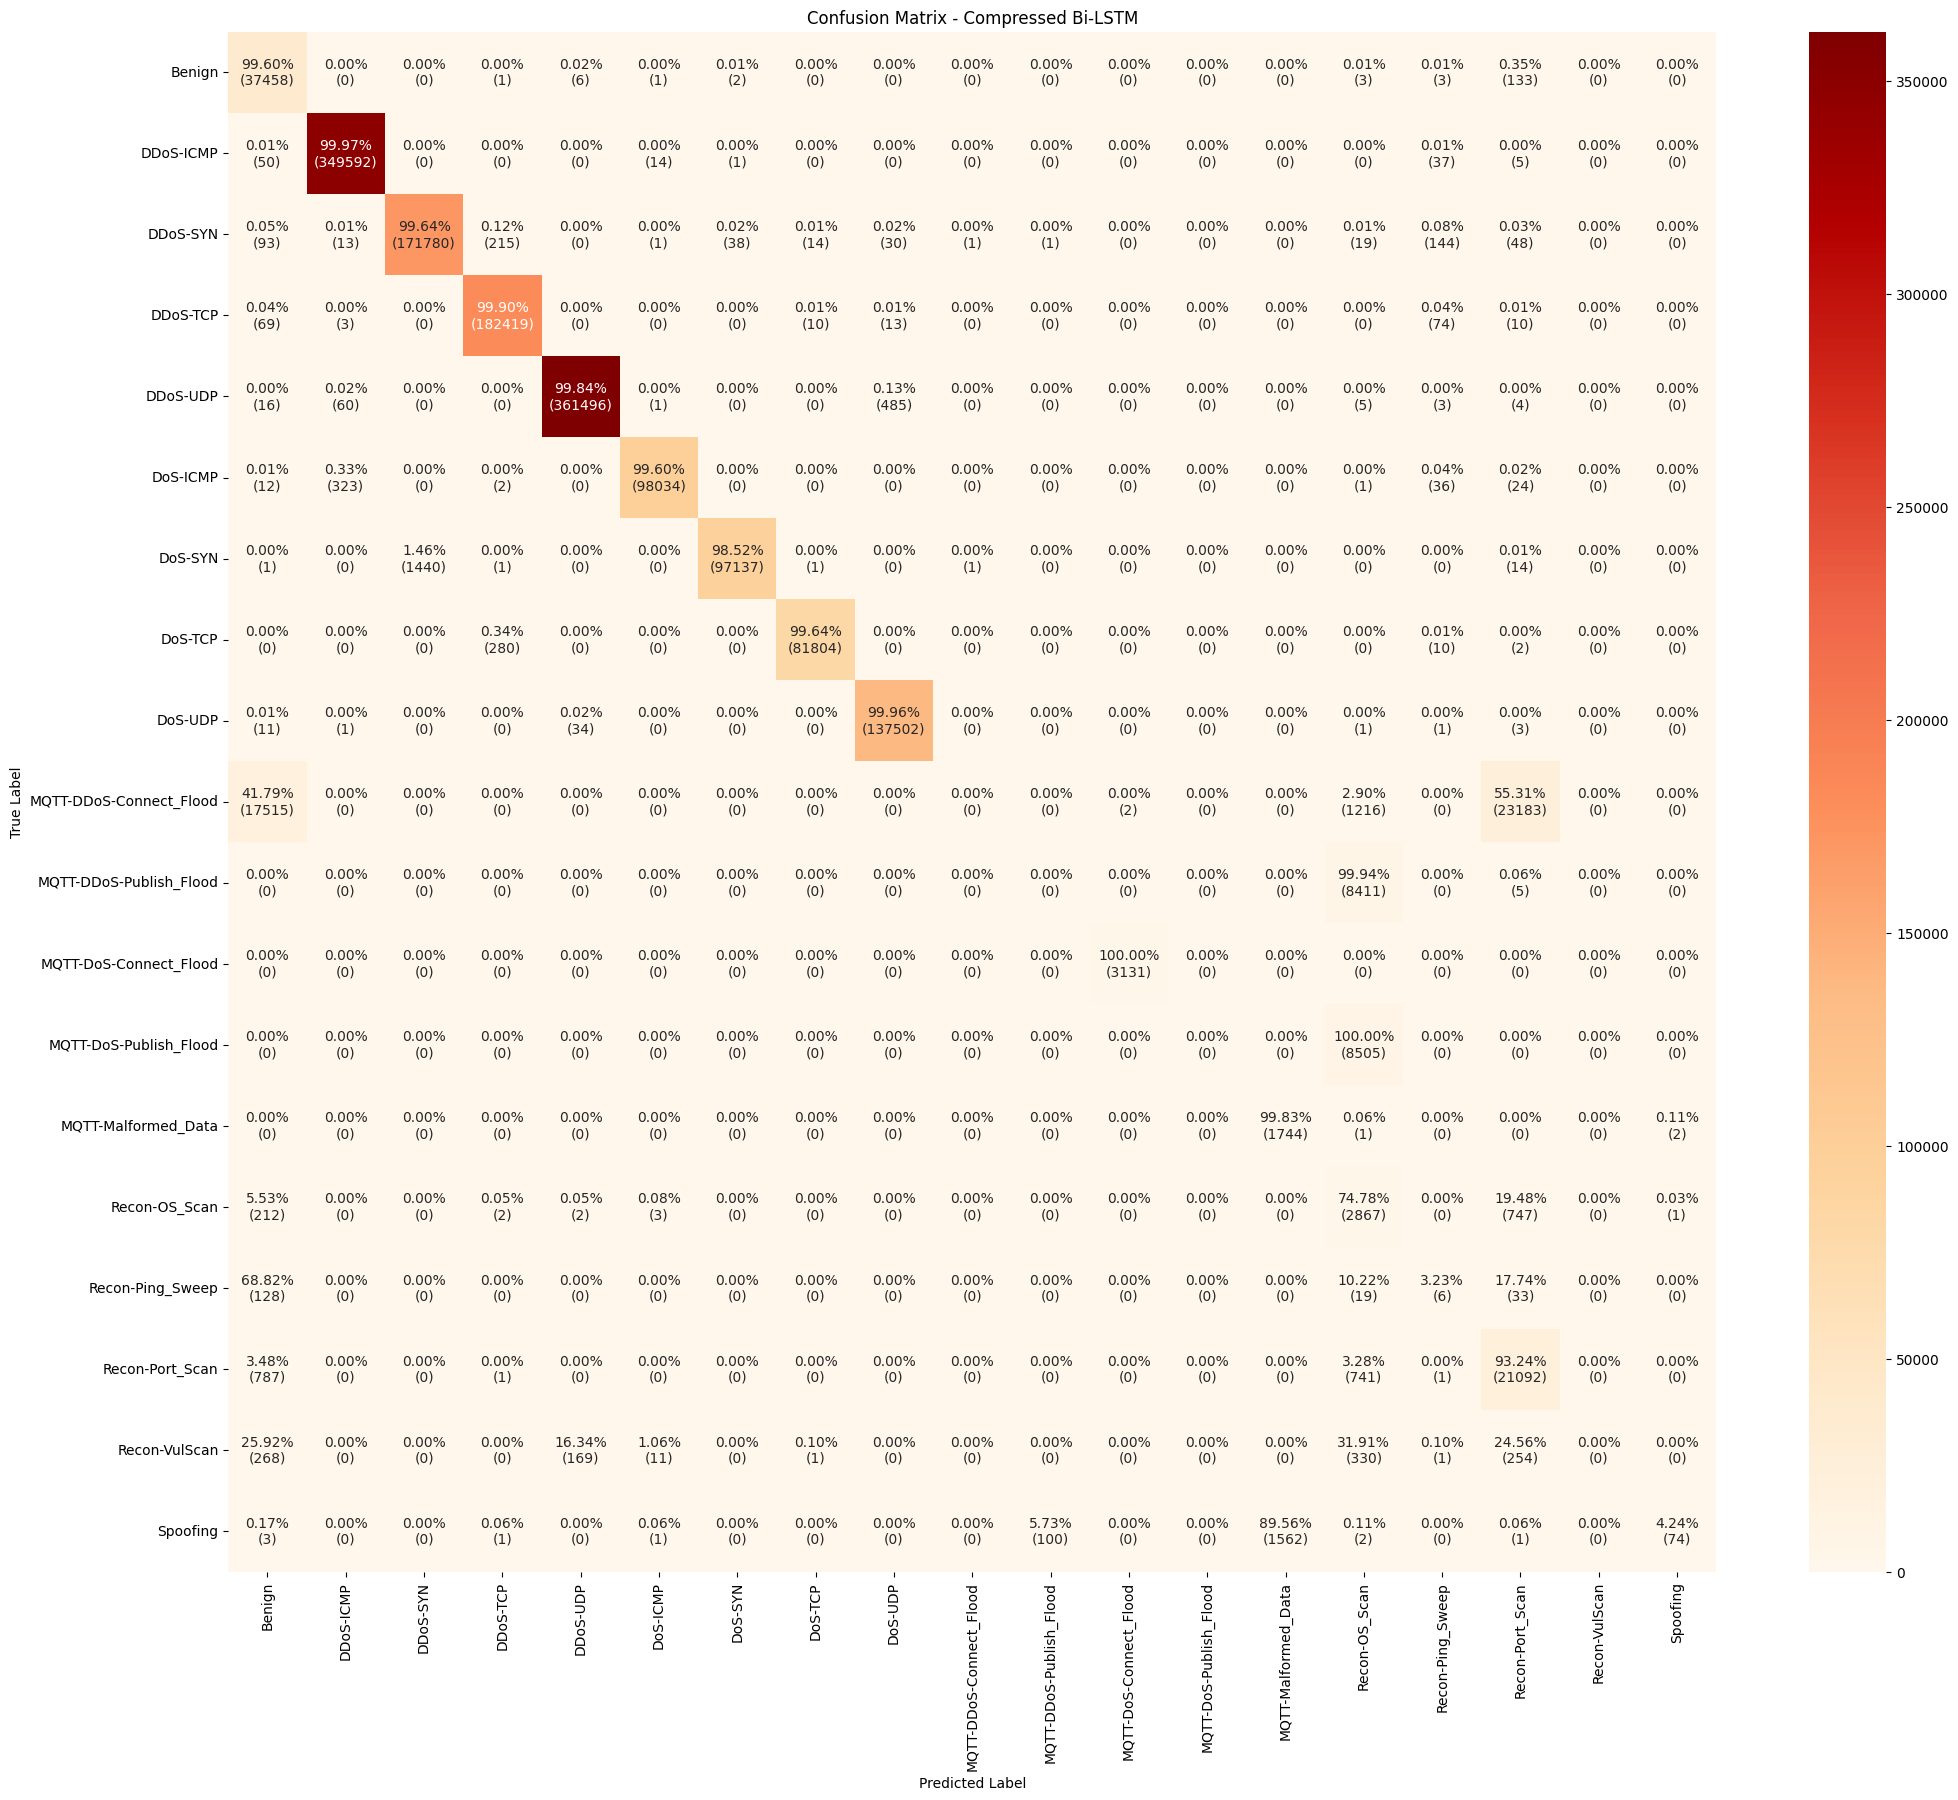

Confusion matrix results saved to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/confusion_matrix_results.json


In [ ]:
# Load the preprocessed data and LabelEncoder
data = np.load(data_path)

# Load features and labels
X_test = data['X_test1']
y_test = data['y_test']

# Load LabelEncoder
label_encoder = LabelEncoder()
label_encoder.classes_ = data['label_classes']

# Predicted labels to decode
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)
y_true_decoded = label_encoder.inverse_transform(y_true)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Compute the confusion matrix
def compute_and_plot_confusion_matrix(y_true, y_pred, class_names, save_path=None):

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix by rows
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    annot = np.empty_like(cm, dtype=object)
    row_sums = cm.sum(axis=1)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            total = row_sums[i]
            percent = cm_normalized[i, j] * 100 if total != 0 else 0
            annot[i, j] = f"{percent:.2f}%\n({count})" if total != 0 else "—"

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(24, 20))
    sns.heatmap(cm, annot=annot, fmt='s', cmap='OrRd', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Compressed Bi-LSTM')

    # Display the heatmap
    plt.show()

compute_and_plot_confusion_matrix(y_true_decoded, y_pred_decoded, class_names=label_encoder.classes_.tolist())


## Saving the Model

*   Saving the evaluated model as.json file for future analysis



In [ ]:
import time
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Evaluate the model and save
def evaluate_and_save_model(model, X_test, y_test_categorical, model_name, save_path):

    # Record the start time
    start_eval = time.time()

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

    # Record the end time
    end_eval = time.time()
    eval_time = end_eval - start_eval

    # Predicted probabilities
    y_pred_probs = model.predict(X_test)

    y_pred = np.argmax(y_pred_probs, axis=1)

    y_true = np.argmax(y_test_categorical, axis=1)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Store all results in a dictionary
    results = {
        "model_name": model_name,
        "accuracy": float(accuracy),
        "loss": float(loss),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "evaluation_time_sec": float(eval_time),
        "confusion_matrix": conf_matrix.tolist(),
        "true_labels": y_true.tolist(),
        "predicted_labels": y_pred.tolist(),
        "predicted_probabilities": y_pred_probs.tolist()
    }

    # Save results dictionary as a JSON file
    with open(save_path, "w") as f:
        json.dump(results, f)

    print(f"Results saved successfully to {save_path}")

file_name = "results_LSTM_Compressed_19.json"
save_path = os.path.join(save_file, file_name)

# Call the evaluate_and_save_model function with your specific parameters
evaluate_and_save_model(
    model=model,
    X_test=X_test,
    y_test_categorical=y_test,
    model_name="LSTM_Compressed_19",
    save_path=save_path
)


50444/50444 ━━━━━━━━━━━━━━━━━━━━ 101s 2ms/step
Results saved successfully to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result_Compressed/results_LSTM_Compressed_19.json
